# Data Exploration with Pandas
Explote the basics of Pandas with an example dataset from the Chicago Data Portal at https://data.cityofchicago.org

In [19]:
import pandas as pd

#load daa direct from the City of Chicago Portal. 
#df = pd.read_csv('https://data.cityofchicago.org/api/views/6iiy-9s97/rows.csv?accessType=DOWNLOAD')


df = pd.read_csv("C:/Users/Tammy/Downloads/CTA_-_Ridership_-__L__Station_Entries_-_Daily_Totals.csv")


# Basic Exploration

## What's in the data?

In [20]:
df.head(5)

,station_id,stationname,date,daytype,rides
0,41280,Jefferson Park,12/22/2017,W,6104
1,41000,Cermak-Chinatown,12/18/2017,W,3636
2,40280,Central-Lake,12/02/2017,A,1270
3,40140,Dempster-Skokie,12/19/2017,W,1759
4,40690,Dempster,12/03/2017,U,499


# What are some basic statistics about the data?


In [21]:
df.shape

(1114984, 5)

In [22]:
df.describe()

,station_id,rides
count,1.114984e+06,1.114984e+06
mean,4.076594e+04,3.090887e+03
std,4.487401e+02,3.140797e+03
min,4.001000e+04,0.000000e+00
25%,4.037000e+04,9.770000e+02
50%,4.076000e+04,2.036000e+03
75%,4.115000e+04,4.072000e+03
max,4.170000e+04,3.632300e+04


In [23]:
df["stationname"].value_counts()

Racine                    7841
Montrose-Brown            7839
Western-Forest Park       7838
Monroe/Dearborn           7838
Montrose-O'Hare           7837
                          ... 
Morgan-Lake               3683
Washington/State          2953
Cermak-McCormick Place    2708
Washington/Wabash         1765
Homan                       31
Name: stationname, Length: 148, dtype: int64

# Selection based on Conditionals

The most and the fewest rides. 

In [30]:
df[df["rides"] == max(df["rides"])].head(1)

,station_id,stationname,date,daytype,rides
912512,41320,Belmont-North Main,06/28/2015,U,36323


In [31]:
df[df["rides"] == min(df["rides"])].head(1)

,station_id,stationname,date,daytype,rides
23,40200,Randolph/Wabash,12/25/2017,U,0


What station had zero rides?

In [37]:
df[df["rides"] == 0]


,station_id,stationname,date,daytype,rides
23,40200,Randolph/Wabash,12/25/2017,U,0
110,40640,Madison/Wabash,12/05/2017,W,0
333,40640,Madison/Wabash,12/03/2017,U,0
354,40640,Madison/Wabash,12/11/2017,W,0
423,40640,Madison/Wabash,12/30/2017,A,0
...,...,...,...,...,...
1114506,40640,Madison/Wabash,11/16/2017,W,0
1114560,41440,Addison-Brown,02/24/2007,A,0
1114709,40640,Madison/Wabash,07/11/2016,W,0
1114947,40600,Kostner,03/11/2001,U,0


In [38]:
df[df["rides"] == 0].shape

(13002, 5)

In [45]:

zerogroups = zero.groupby(['stationname', 'daytype']).count()
zerogroups.sort_values(by=['date'],ascending=False)

station_id  date  rides
stationname      daytype                         
Madison/Wabash   W               711   711    711
Washington/State W               516   516    516
Skokie           U               390   390    390
                 A               355   355    355
Randolph/Wabash  W               351   351    351
...                              ...   ...    ...
Addison-O'Hare   A                 1     1      1
Ashland-Lake     W                 1     1      1
51st             U                 1     1      1
                 A                 1     1      1
Indiana          U                 1     1      1

[262 rows x 3 columns]

## Exploring Temporal Patterns
The first date and the last date.

In [44]:
min(df["date"])

'01/01/2001'

In [46]:
max(df["date"])

'12/31/2021'

# Create a Time Index
We have date from 01/01/2001' till '12/31/2021'. Next step is to convert the column to a proper 'Datetime' type, and set the index to this column. 

In [49]:
df["date"] = pd.to_datetime(df["date"])
df.set_index("date", inplace=True)

In [50]:
df.head(10)

,station_id,stationname,daytype,rides
date,,,,
2017-12-22,41280,Jefferson Park,W,6104
2017-12-18,41000,Cermak-Chinatown,W,3636
2017-12-02,40280,Central-Lake,A,1270
2017-12-19,40140,Dempster-Skokie,W,1759
2017-12-03,40690,Dempster,U,499
2017-12-30,41660,Lake/State,A,8615
2017-12-17,40180,Oak Park-Forest Park,U,442
2017-12-02,40250,Kedzie-Homan-Forest Park,A,1353
2017-12-07,40120,35th/Archer,W,3353


# Sort the Dataframe by date

In [51]:
rides_by_date = df.sort_values(by='date')
rides_by_date.head(10)

,station_id,stationname,daytype,rides
date,,,,
2001-01-01,41330,Montrose-O'Hare,U,383
2001-01-01,41260,Austin-Lake,U,399
2001-01-01,40420,Cicero-Cermak,U,0
2001-01-01,40930,Midway Airport,U,2030
2001-01-01,40920,Pulaski-Forest Park,U,474
2001-01-01,40450,95th/Dan Ryan,U,3948
2001-01-01,40030,Pulaski-Lake,U,483
2001-01-01,40310,Western-Orange,U,460
2001-01-01,40150,Pulaski-Cermak,U,0


## Sanity Checking

In [58]:
garfield_red = rides_by_date[rides_by_date["stationname"]=="Garfield-Dan Ryan"]
garfield_red.head(14)

,station_id,stationname,daytype,rides
date,,,,
2001-01-01,41170,Garfield-Dan Ryan,U,1457
2001-01-02,41170,Garfield-Dan Ryan,W,3748
2001-01-03,41170,Garfield-Dan Ryan,W,3977
2001-01-04,41170,Garfield-Dan Ryan,W,4185
2001-01-05,41170,Garfield-Dan Ryan,W,4533
2001-01-06,41170,Garfield-Dan Ryan,A,3341
2001-01-07,41170,Garfield-Dan Ryan,U,1972
2001-01-08,41170,Garfield-Dan Ryan,W,4590
2001-01-09,41170,Garfield-Dan Ryan,W,4511


In [59]:
garfield_green = rides_by_date[rides_by_date["stationname"]=="Garfield-South Elevated"]
garfield_green.head(14)

,station_id,stationname,daytype,rides
date,,,,
2001-01-01,40510,Garfield-South Elevated,U,248
2001-01-02,40510,Garfield-South Elevated,W,617
2001-01-03,40510,Garfield-South Elevated,W,657
2001-01-04,40510,Garfield-South Elevated,W,697
2001-01-05,40510,Garfield-South Elevated,W,770
2001-01-06,40510,Garfield-South Elevated,A,443
2001-01-07,40510,Garfield-South Elevated,U,295
2001-01-08,40510,Garfield-South Elevated,W,695
2001-01-09,40510,Garfield-South Elevated,W,696


## Visualizing Timeseries Data

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(rc={'figure.figsize':(11, 4 )})

<AxesSubplot:xlabel='date'>

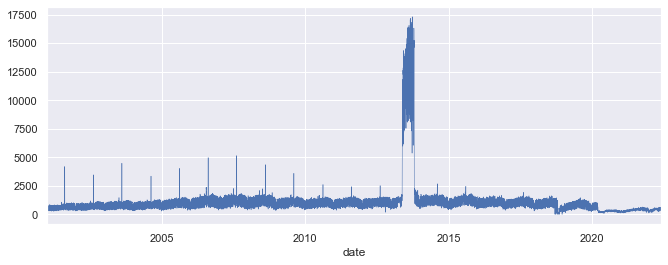

In [63]:
garfield_green['rides'].plot(linewidth=0.5)

<AxesSubplot:xlabel='date'>

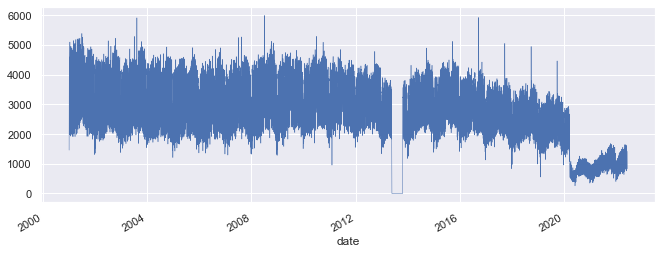

In [64]:
garfield_red['rides'].plot(linewidth=0.5)

You can see the a jump at the ridership at the Garfield Green Line and a dip in the garfield Red Line ridership.
Here's what happend: https://www.transitchicago.com/redshouth/

Why are there so many zero values in the data?

<AxesSubplot:xlabel='date'>

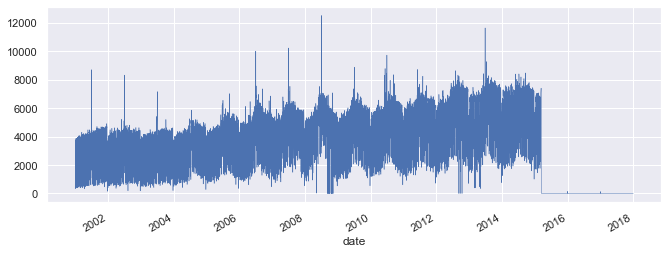

In [67]:
 rides_by_date[rides_by_date["stationname"]=="Madison/Wabash"]["rides"].plot(linewidth=0.5)

Was this even real or jus a glitch?: https://en.wikipedia.org/wiki/Madison/Wabash_station